In [1]:
import os
import sys
import glob
import numpy
import pandas
from tqdm.auto import tqdm

# analysis
import tadpose
from tadpose.analysis import BatchGrouper
from tadpose.utils import create_experiment_table
from tadpose import plot

from scipy.ndimage import gaussian_filter1d

# ploting
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

### Create experiment table (if not done before)

In [3]:
exp_table, exp_table_path = create_experiment_table()
exp_table

Error: no input folder selected... abort


### Setup alinger

In [4]:
aligner = tadpose.alignment.TadpoleAligner(
    {"Tail_Stem": numpy.array([0, 0.0]), "Heart_Center": numpy.array([0, 1.0])},
    scale=False,
)

### BatchGrouper object

In [5]:
BG = BatchGrouper(
    exp_table="B:/fs3-bifexchgrp/BIF_StaffSci/Christoph/sweengrp/WT-Series/dataset_01/dataset_01.tab",
    aligner=aligner,
    output_grouped_by="Stage",
)

### Configure plots

In [6]:
# Usual scatter plot
hm = plot.HeatMap(N_max=2000, contour=False, scatter=True)

# Dish plot
dm = plot.DishMovement(part="Heart_Center", color="orange", lw=1, ls="-.")

# SpeedMaps
sm1 = plot.SpeedMap(cmap="gray_r", figsize=(20, 8))
sm2 = plot.SpeedMap(
    parts=("Heart_Center",), ego=False, vmax=10, cmap="gray_r", figsize=(20, 2)
)

# Speed boxplots
sb = plot.SpeedBox(ego=True, cmap="Reds")

### Iterate over batch grouper object and plot by calling configured plot object
each iteration will yield `(tad, grp, ind, row_info)`
* tad: tadpole object
* grp: name of the group
* ind: index into experiment table (usefull for writing results back)
* row_info: the row from the experiment table

  0%|          | 0/6 [00:00<?, ?it/s]

\\fs.ist.ac.at\dfshome\csommer\projects\068_lora_tadpole\tadpose\tadpose\plot.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots()


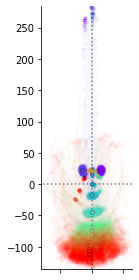

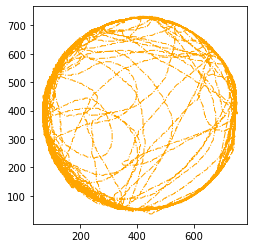

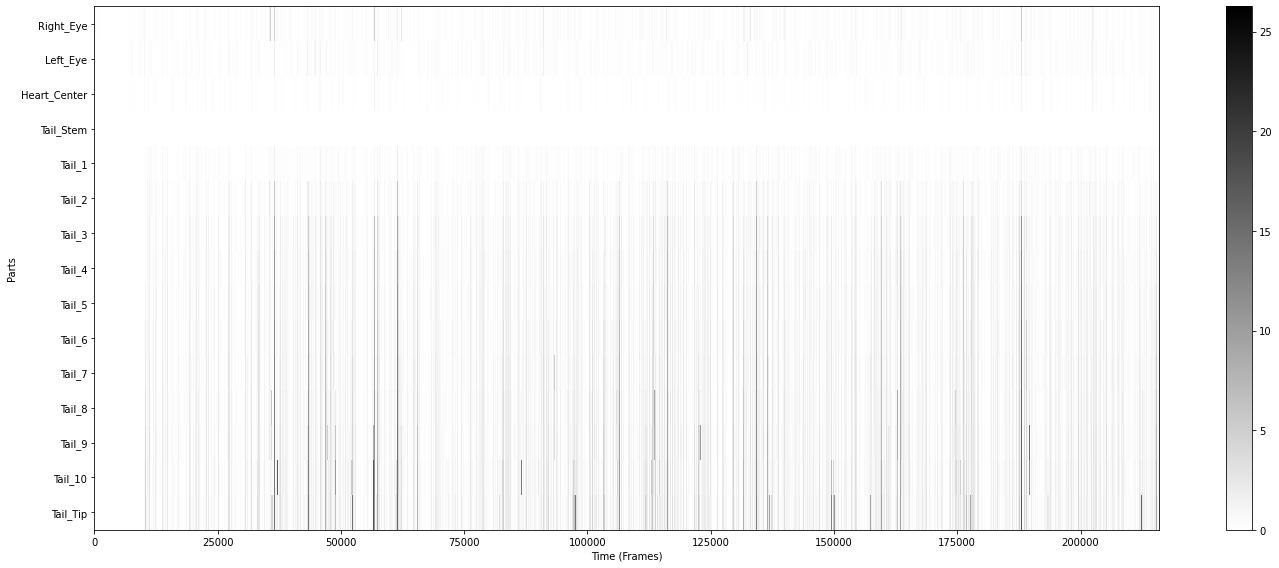

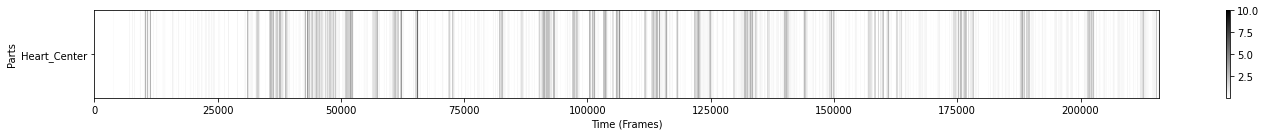

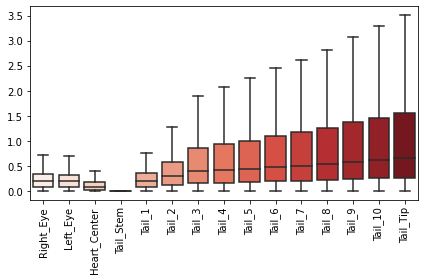

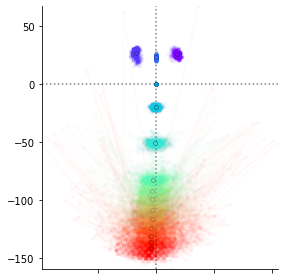

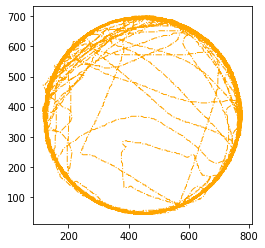

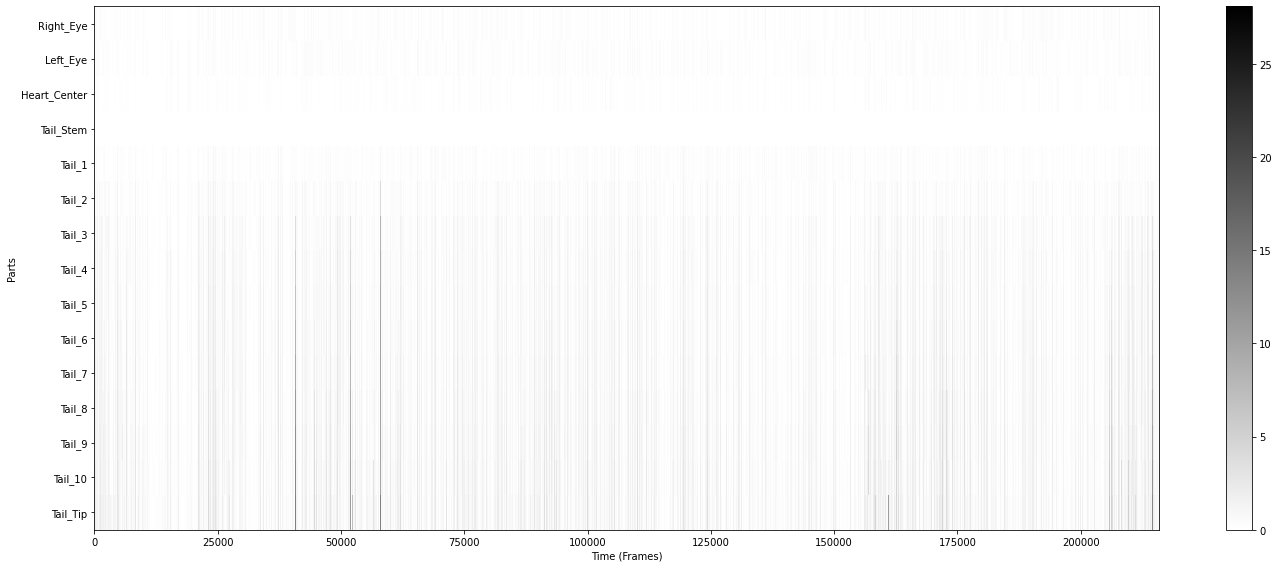

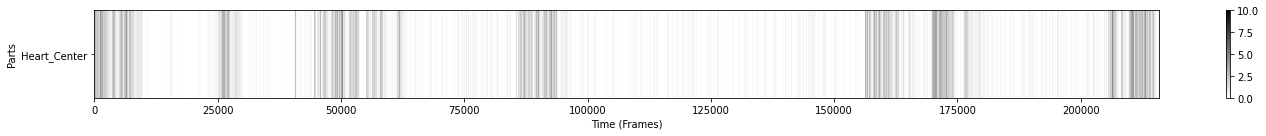

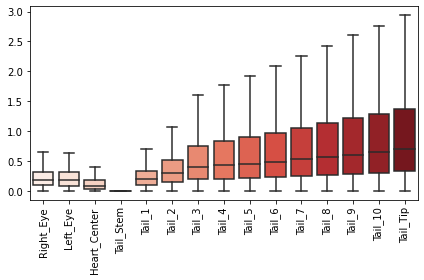

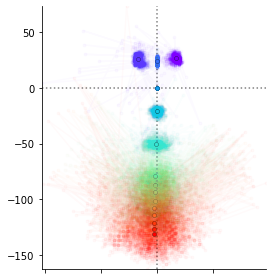

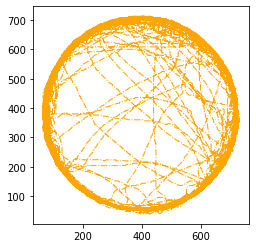

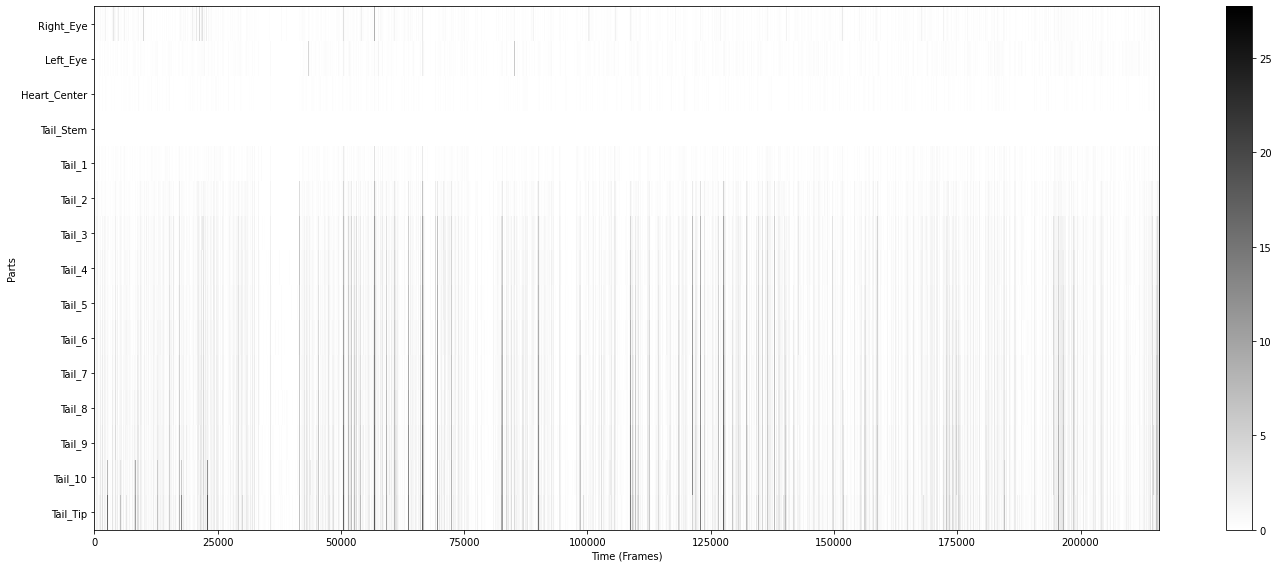

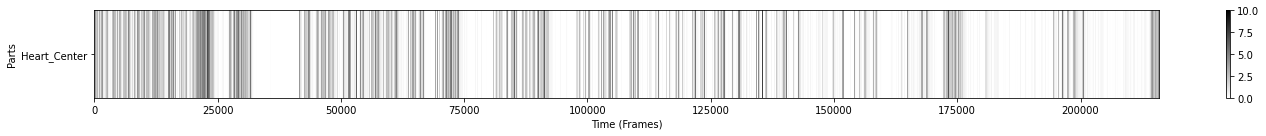

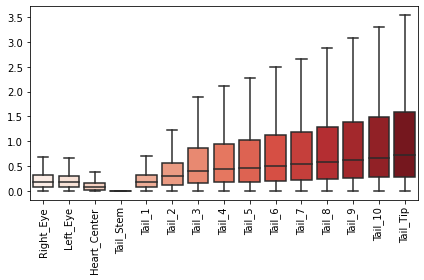

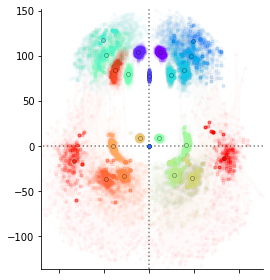

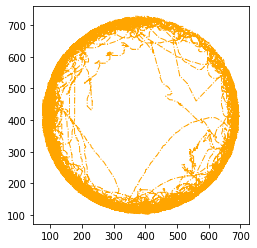

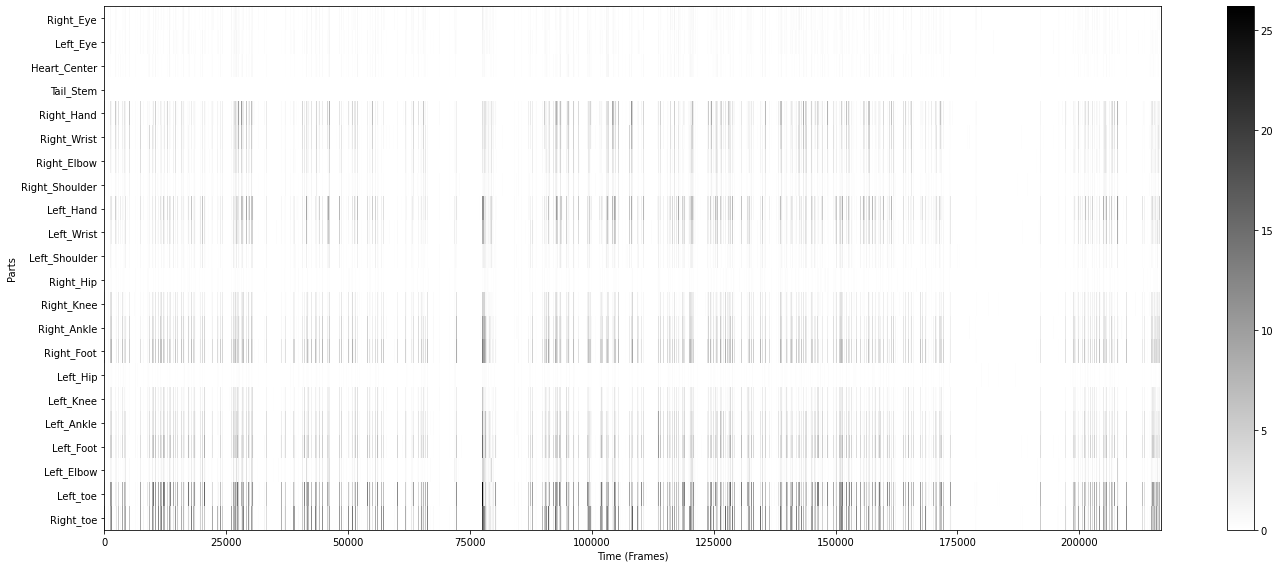

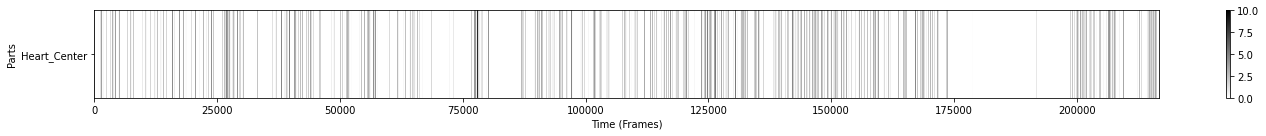

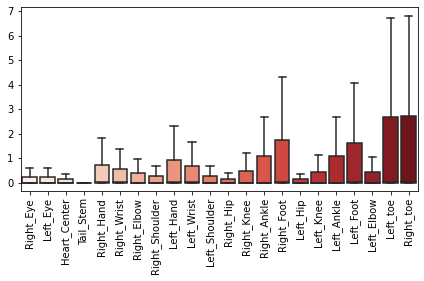

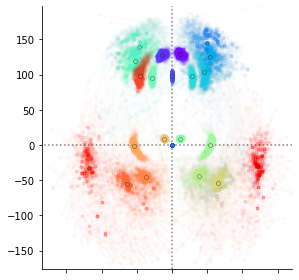

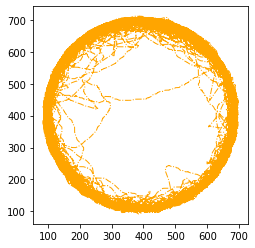

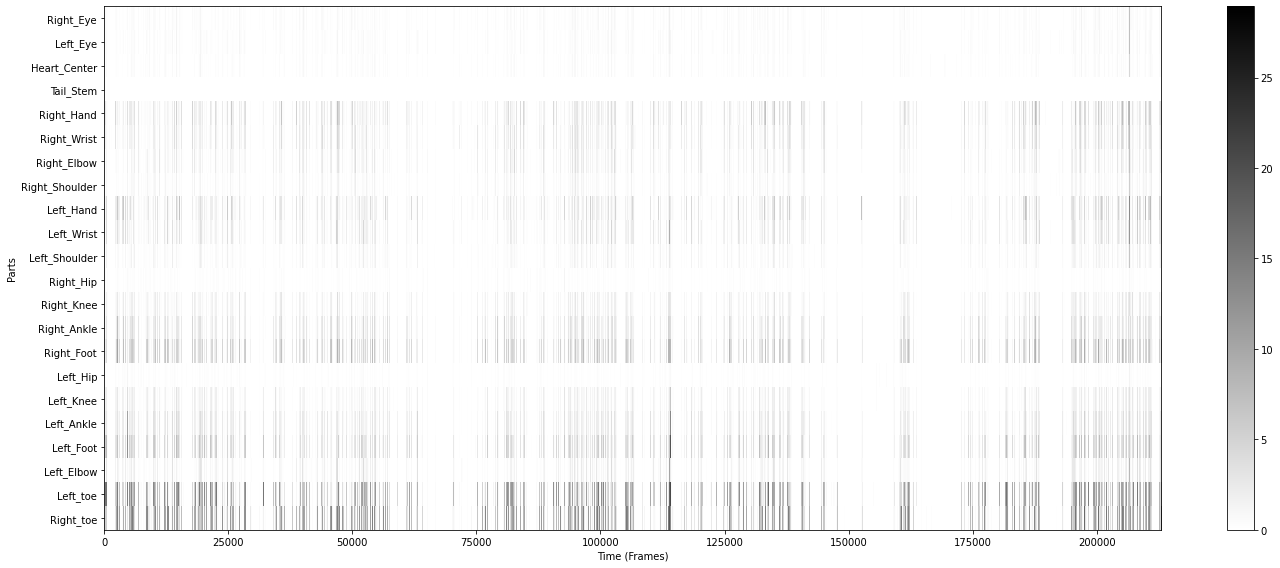

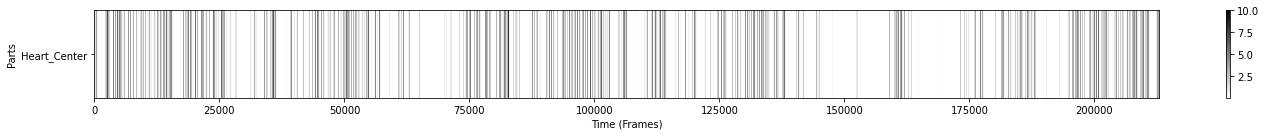

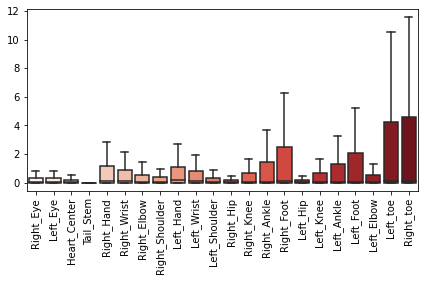

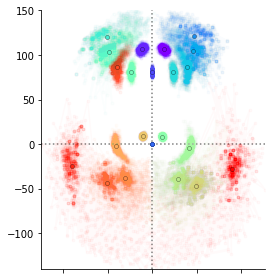

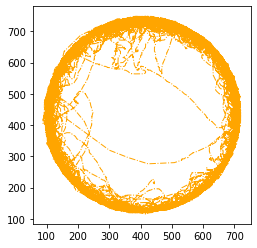

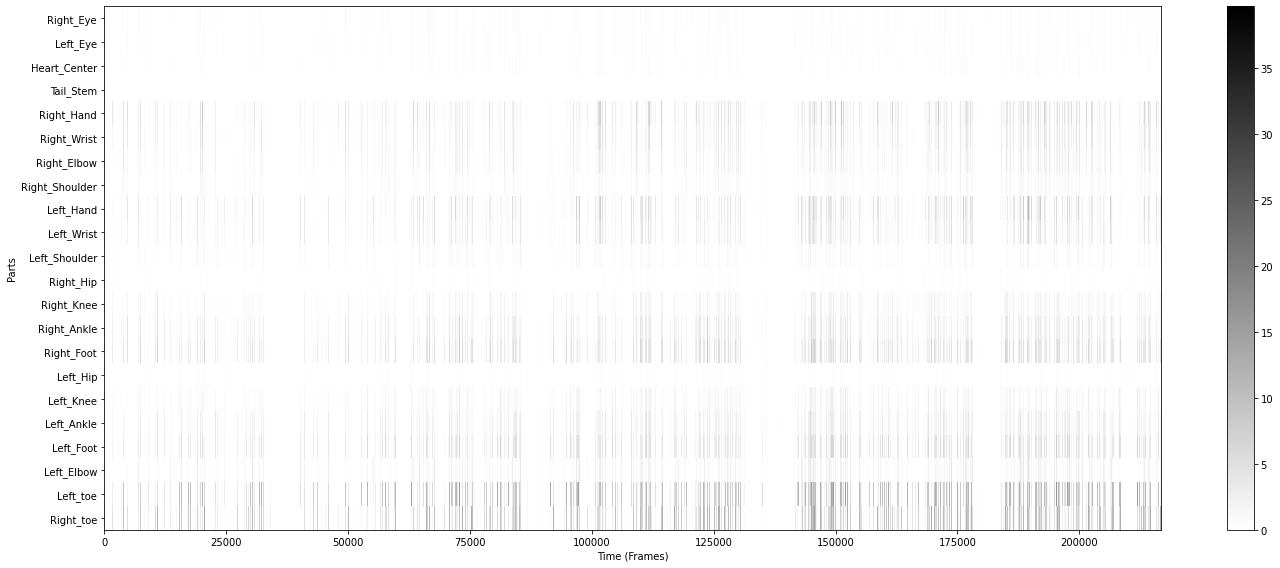

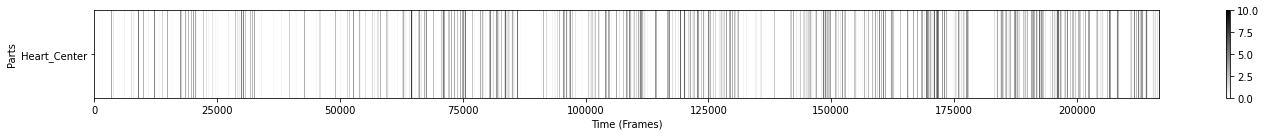

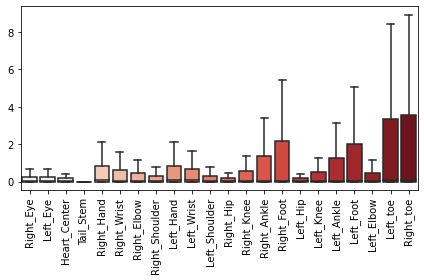

In [7]:
# example plotting
for tad, grp, ind, row_info in tqdm(BG):
    # create output dir
    plot_dir = (
        f"B:/fs3-bifexchgrp/BIF_StaffSci/Christoph/sweengrp/WT-Series/dataset_01/{grp}"
    )
    os.makedirs(plot_dir, exist_ok=True)

    # do actual plotting
    hm(tad, row_info, outdir=plot_dir)
    dm(tad, row_info, outdir=plot_dir)
    sm1(tad, row_info, outdir=plot_dir)
    sm2(tad, row_info, outdir=plot_dir)
    sb(tad, row_info, outdir=plot_dir)